# Aula 1 — 17.09
## Importando as bibliotecas e fazendo uma lista com os caminhos dos arquivos

In [ ]:
import numpy as np #álgebra linear
import pandas as pd #processamento de dados, leitura e transformação de CSV
import os #sistema operacional

lista = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        lista.append(os.path.join(dirname, filename)) #junta todos os arquivos em uma lista

## Lendo o CSV e armazenando em um dataframe

In [ ]:
dfs = [pd.read_csv(item) for item in lista] #itera os itens da lista lê o csv de cada um
df = pd.concat(dfs) #agora todos os dados estão em um dataframe

## Limpando as colunas, atualizando o dataframe

In [ ]:
df = df[['Script Type', 'Year', 'Primary Genre', 'Worldwide Gross ($million)', 'Rotten Tomatoes  critics', 'Metacritic  critics', 'Average audience ', 'Budget ($million)']]

## Limpando os dados de 'Primary Genre'

In [ ]:
coluna = 'Primary Genre'
df[coluna] = df[coluna].fillna('unknown')
df[coluna].value_counts()

Primary Genre
unknown      1689
action         68
drama          56
comedy         43
adventure      24
thriller       21
horror         21
crime          13
biography       8
romance         7
animation       6
musical         3
fantasy         3
western         2
sci-fi          2
mystery         1
Name: count, dtype: int64

## Limpando demais NaN do dataframe

In [ ]:
df.dropna(inplace=True)

## Limpando os dados de 'Script Type'

In [ ]:
col = df.columns.get_loc('Script Type')
df['Script Type'] = df['Script Type'].fillna('unknown')

for i in range(len(df)):
    value = df.iloc[i, col]

    if 'original screenplay' in value:
        value = 'original'
    elif 'sequel' in value:
        value = 'sequel'
    elif 'true story' in value or 'documentary' in value:
        value = 'real'
    elif 'adaptation' in value:
        value = 'adaptation'
    elif 'remake' in value:
        value = 'remake'
    elif 'prequel' in value:
        value = 'prequel'
    else:
        value = 'unknown'
    
    df.iloc[i, col] = value

## Limpando os dados de 'Rotten Tomatoes  critics'

In [ ]:
coluna = 'Rotten Tomatoes  critics'
df = df[df[coluna] != '-']
df[coluna] = pd.to_numeric(df[coluna])
df[coluna].unique()

array([ 50.,  42.,  95.,  62.,  83.,  11.,  80.,  84.,  18.,  57.,  60.,
        39.,  36.,  64.,  89.,  14.,  94.,  51.,  40.,  66.,  97.,  61.,
        78.,  45.,  19.,  53.,  63.,  69.,  25.,  23.,  77.,  47.,  48.,
        67.,  92.,  55.,  91.,  26.,  37.,  56.,  68.,  73.,  17.,  90.,
        88.,  71.,  79.,  46.,  81.,  43.,  85.,  99.,  59.,  22.,  34.,
        27.,  10.,  32.,  54.,  24.,  44.,  52.,  29.,  93.,  86.,  13.,
        28.,  49.,  31.,  82.,   1.,   2.,  35.,   3.,   4.,  15.,   8.,
         9.,  70.,  21.,  20.,  87.,  41.,  30.,  72.,  33.,  75.,  98.,
        65.,  12.,  38.,  16.,  58.,  74.,   7.,   5.,   6.,  76.,  96.,
         0., 100.])

## Limpando os dados de 'Metacritic  critics'

In [ ]:
coluna = 'Metacritic  critics'
df = df[df[coluna] != '-']
df[coluna] = pd.to_numeric(df[coluna])
df[coluna].unique()

array([ 51,  43,  80,  50,  79,  39,  61,  30,  53,  54,  45,  40,  71,
        28,  78,  65,  84,  46,  58,  44,  72,  64,  32,  52,  48,  57,
        31,  60,  73,  59,  49,  63,  68,  81,  38,  42,  66,  82,  70,
        91,  67,  47,  83,  17,  96,  24,  25,  36,  75,  26,  19,  69,
        37,  56,  41,  89,  55,  35,  77,  11,  76,  29,  13,  62,  33,
        85,  27,  74,  92,  88,  94,  23,  34,  18,  93,  21,  22,  87,
        99,  86,   9,  15,  20,  14,  95,  90,  12, 100,  16,  97])

## Limpando os dados de 'Average audience '

In [ ]:
coluna = 'Average audience '
df = df[df[coluna] != '-']
df[coluna] = pd.to_numeric(df[coluna])
df[coluna].unique()

array([77. , 62. , 81. , 80. , 36. , 76. , 51. , 55. , 91. , 73. , 66. ,
       75. , 41. , 84. , 65. , 25. , 60. , 72. , 47. , 48. , 59. , 54. ,
       52. , 68. , 58. , 88. , 78. , 69. , 85. , 57. , 87. , 67. , 71. ,
       74. , 53. , 64. , 83. , 86. , 63. , 46. , 82. , 79. , 90. , 56. ,
       40. , 39. , 61. , 44. , 31. , 30. , 70. , 42. , 38. , 29. , 24. ,
       50. , 43. , 49. , 35. , 45. , 89. , 90.5, 85.5, 64.5, 77.5, 74.5,
       59.5, 79.5, 55.5, 63.5, 66.5, 48.5, 69.5, 82.5, 73.5, 58.5, 40.5,
       57.5, 41.5, 72.5, 54.5, 47.5, 62.5, 80.5, 65.5, 67.5, 70.5, 75.5,
       32.5, 56.5, 81.5, 71.5, 34. , 33.5, 76.5, 86.5, 15.5, 52.5, 78.5,
       46.5, 18.5, 60.5, 51.5, 43.5, 61.5, 93. , 22. , 28. , 32. , 27. ,
       33. , 37. , 92. , 23. ,  7. , 19. ])

## Limpando os dados de 'Worldwide Gross (million)' e 'Budget (million)'

In [ ]:
coluna = 'Worldwide Gross ($million)'
df = df[df[coluna] != '-'].copy()
col = df.columns.get_loc(coluna)
for i in range(len(df)):
    value = df.iloc[i, col]
    text = str(value)
    text = text.replace(',', '')
    value = float(text)
    df.iloc[i, col] = value

In [ ]:
df['Worldwide Gross ($million)'] = pd.to_numeric(
    df['Worldwide Gross ($million)'].replace('[\$,]', '', regex=True), errors='coerce'
)

df['Budget ($million)'] = pd.to_numeric(
    df['Budget ($million)'].replace('[\$,]', '', regex=True), errors='coerce'
)

df.dropna(subset=['Worldwide Gross ($million)', 'Budget ($million)'], inplace=True)

## Transformando os campos textuais

In [ ]:
from sklearn.preprocessing import LabelEncoder #transforma textos em números, importado da scikit-learn

le = LabelEncoder()
df['Primary Genre'] = le.fit_transform(df['Primary Genre'])

le2 = LabelEncoder()
df['Script Type'] = le2.fit_transform(df['Script Type'])

## Criando histogramas simples com Matplotlib

Text(0, 0.5, 'Quantidade de Filmes')

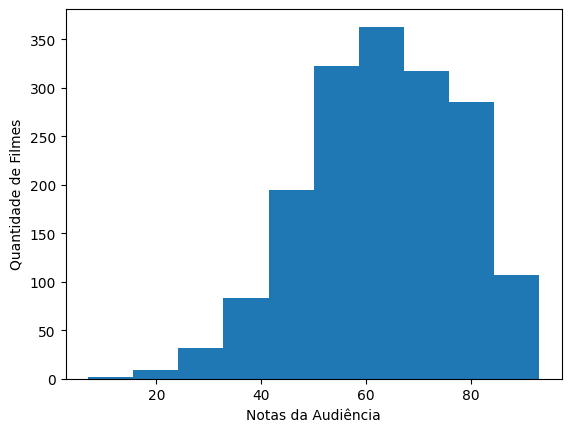

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['Average audience '])
plt.xlabel('Notas da Audiência')
plt.ylabel('Quantidade de Filmes')

Text(0, 0.5, 'Quantidade de Filmes')

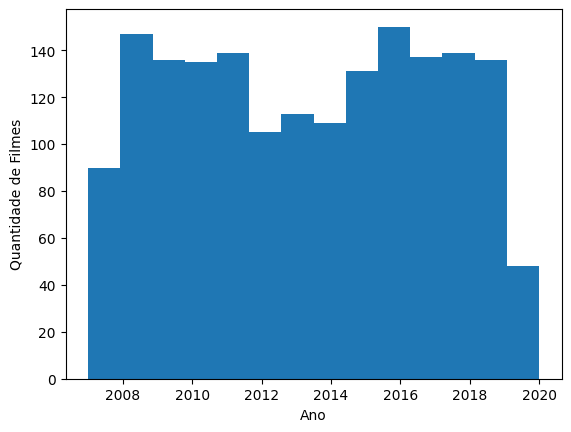

In [ ]:
plt.hist(df['Year'], bins=14)
plt.xlabel('Ano')
plt.ylabel('Quantidade de Filmes')

## Criando boxplots simples com Matplotlib

Text(0, 0.5, 'Quantidade de Filmes')

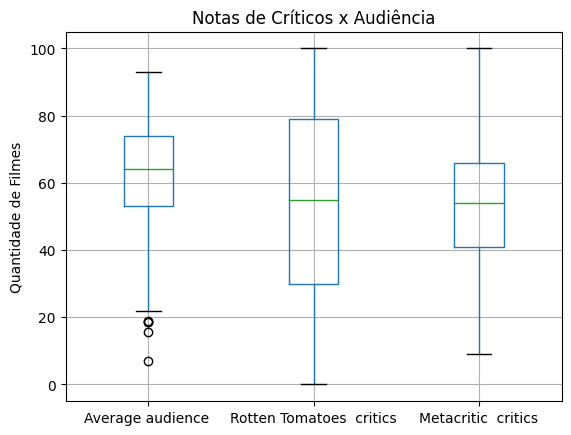

In [ ]:
df.boxplot(column = ['Average audience ', 'Rotten Tomatoes  critics', 'Metacritic  critics']).plot()
plt.title('Notas de Críticos x Audiência')
plt.ylabel('Quantidade de Filmes')

## Criando scatter plots simples com Matplotlib

Text(0.5, 1.0, 'Relação Críticas Rotten/Metacritic')

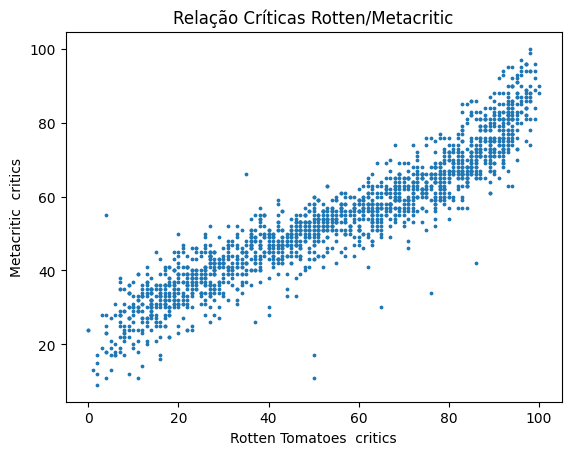

In [ ]:
df.plot.scatter('Rotten Tomatoes  critics', 'Metacritic  critics', 3)
plt.title('Relação Críticas Rotten/Metacritic')

<Axes: xlabel='Worldwide Gross ($million)', ylabel='Budget ($million)'>

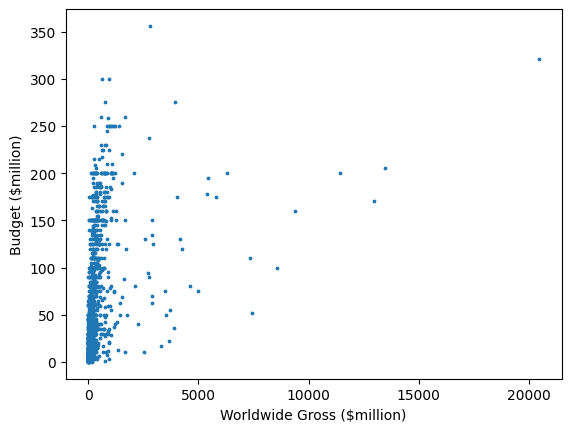

In [ ]:
df.plot.scatter('Worldwide Gross ($million)', 'Budget ($million)', 3)

<Axes: xlabel='Average audience ', ylabel='Worldwide Gross ($million)'>

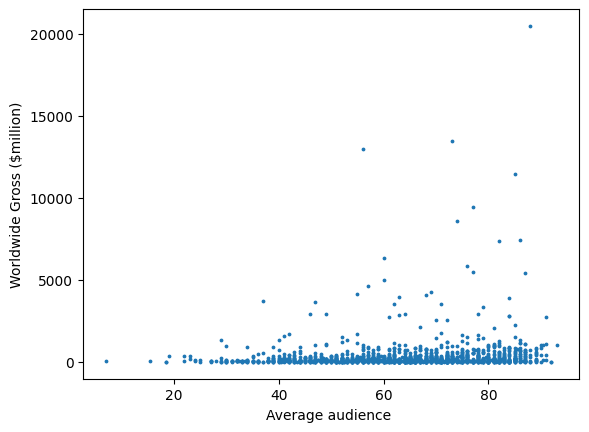

In [ ]:
df.plot.scatter('Average audience ', 'Worldwide Gross ($million)', 3)

# Códigos úteis
## Código para identificar a ocorrência de NaN em uma coluna

In [ ]:
df.isna().sum()

Script Type                   0
Year                          0
Primary Genre                 0
Worldwide Gross ($million)    0
Rotten Tomatoes  critics      0
Metacritic  critics           0
Average audience              0
Budget ($million)             0
dtype: int64

## Código para mostrar detalhes das colunas, contagem, média, mínimo, máximo, etc.

In [ ]:
df.describe()

,Script Type,Year,Primary Genre,Worldwide Gross ($million),Rotten Tomatoes critics,Metacritic critics,Average audience,Budget ($million)
count,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000
mean,1.643149,2013.355102,11.706122,306.044373,54.411079,53.985423,63.141983,55.706186
std,1.790942,3.868367,1.637848,970.184125,27.410565,17.247912,14.614198,56.421970
min,0.000000,2007.000000,0.000000,0.000000,0.000000,9.000000,7.000000,0.015000
25%,0.000000,2010.000000,12.000000,38.315000,30.000000,41.000000,53.000000,18.000000
50%,1.000000,2013.000000,12.000000,95.000000,55.000000,54.000000,64.000000,35.000000
75%,3.000000,2017.000000,12.000000,245.865000,79.000000,66.000000,74.000000,75.000000
max,5.000000,2020.000000,13.000000,20462.000000,100.000000,100.000000,93.000000,356.000000
